# <center>Give Me Credit: Kaggle competition</center>

## Première Etape : Importation des librairies nécessaires

In [1]:
from bigml.api import BigML
from pandas import read_csv
import kaggle
import matplotlib.pyplot as plt
import random
import pandas as pd

*<center>Préciser l'id du projet BigML</center>*

In [2]:
api = BigML(project= 'project/5d94a407eba31d45c8000088')

## Deuxième Etape: Importer les données de train

*<center>Créer le dataset de training: trainfull</center>*

In [3]:
df = read_csv('../handson-ml2/kaggle-give-me-credit-train.csv')

In [4]:
df = df.fillna(0)
df['IncomePerPerson'] = df['MonthlyIncome']/ (df['NumberOfDependents']+1)
df['NumberOfDaysLate'] = df['NumberOfTimes90DaysLate']+ df['NumberOfTime60-89DaysPastDueNotWorse']+ df['NumberOfTime30-59DaysPastDueNotWorse']
df['NumberCreditLines'] = df['NumberOfOpenCreditLinesAndLoans']- df['NumberRealEstateLoansOrLines']
df['MonthlyDebt'] = df['MonthlyIncome'] * df['DebtRatio']
df['MonthlyBalance'] = df['MonthlyIncome'] - df['MonthlyDebt']
df['DebtPerPerson'] = df['MonthlyDebt'] / ( df['NumberOfDependents'] + 1 )
df = df.rename(columns={"Unnamed: 0": "Id"})

In [5]:
df

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,IncomePerPerson,NumberOfDaysLate,NumberCreditLines,MonthlyDebt,MonthlyBalance,DebtPerPerson
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1,3040.000000,2,7,7323.197016,1796.802984,2441.065672
1,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,1300.000000,0,4,316.878123,2283.121877,158.439061
2,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,3042.000000,2,2,258.914887,2783.085113,258.914887
3,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,3300.000000,0,5,118.963951,3181.036049,118.963951
4,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0,63588.000000,1,6,1584.975094,62003.024906,1584.975094
5,6,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,0,1750.000000,0,2,1314.624392,2185.375608,657.312196
6,7,0.305682,57,0,5710.000000,0.0,8,0,3,0,0.0,0,0.000000,0,5,0.000000,0.000000,0.000000
7,8,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,0,3500.000000,0,8,734.790059,2765.209940,734.790059
8,9,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0,0,0.000000,0,2,0.000000,0.000000,0.000000
9,10,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,0,7894.666667,0,5,14359.393699,9324.606301,4786.464566


In [6]:
df.to_csv("trainfull.csv")

In [7]:
source = api.create_source('../handson-ml2/trainfull.csv')

In [8]:
origin_dataset = api.create_dataset(source)

## Troisième étape: Séparation en train et val

*<center>Split 80/20 du trainfull en train et validation</center>*

In [9]:
train_dataset = api.create_dataset (origin_dataset, {"name": "Train80", "sample_rate":0.8, "seed": "myseed"})

In [10]:
val_dataset = api.create_dataset (origin_dataset, {"name": "Val", "sample_rate":0.8, "seed": "myseed", "out_of_bag": True})

## Quatrième étape: Modèle d'apprentissage

*<center>Lancement d'un Modèle ou d'un Deepnet ou autre...</center>*

In [11]:
model = api.create_model(train_dataset, {"objective_field":"SeriousDlqin2yrs"})
api.ok(model)

True

*<center>Evaluation du modèle</center>*

In [12]:
evaluation = api.create_evaluation(model, val_dataset)
api.status(evaluation)
api.ok(evaluation)
evaluation = api.get_evaluation(evaluation)
api.pprint(evaluation['object']['result'])

{   'class_names': ['0', '1'],
    'mode': {   'accuracy': 0.93143,
                'average_area_under_pr_curve': 0,
                'average_area_under_roc_curve': 0,
                'average_balanced_accuracy': 0.5,
                'average_f_measure': 0.48225,
                'average_kendalls_tau_b': 0,
                'average_ks_statistic': 0,
                'average_max_phi': 0,
                'average_phi': 0,
                'average_precision': 0.46572,
                'average_recall': 0.5,
                'average_spearmans_rho': 0,
                'confusion_matrix': [[27943, 0], [2057, 0]],
                'per_class_statistics': [   {   'accuracy': 0.93143,
                                                'balanced_accuracy': 0.5,
                                                'class_name': '0',
                                                'f_measure': 0.9645,
                                                'phi_coefficient': 0,
                                    

                                                                       0.98602],
                                                                   [   0.40653,
                                                                       0.43145,
                                                                       0.98538],
                                                                   [   0.42417,
                                                                       0.45017,
                                                                       0.9852],
                                                                   [   0.43547,
                                                                       0.46223,
                                                                       0.98431],
                                                                   [   0.4461,
                                                                       0.47343,
                                      

                                                                   [   0.96287,
                                                                       0.98093,
                                                                       0.63099],
                                                                   [   0.96953,
                                                                       0.98501,
                                                                       0.63039],
                                                                   [   0.97403,
                                                                       0.98794,
                                                                       0.63],
                                                                   [   0.9743,
                                                                       0.98819,
                                                                       0.62],
                                           

                                                                       0.79],
                                                                   [   0.91803,
                                                                       1.03202,
                                                                       0.77],
                                                                   [   0.91827,
                                                                       1.0318,
                                                                       0.76],
                                                                   [   0.92063,
                                                                       1.03105,
                                                                       0.75821],
                                                                   [   0.92417,
                                                                       1.03063,
                                              

                                                                         0.53233,
                                                                         0.75821],
                                                                     [   0.92417,
                                                                         0.53962,
                                                                         0.75],
                                                                     [   0.92463,
                                                                         0.54351,
                                                                         0.7455],
                                                                     [   0.92557,
                                                                         0.54643,
                                                                         0.74],
                                                                     [   0.92597,
                   

                                                                                                 3626],
                                                                                             0.88741],
                                                                                         [   [   24301,
                                                                                                 686,
                                                                                                 1371,
                                                                                                 3642],
                                                                                             0.89],
                                                                                         [   [   24078,
                                                                                                 658,
                                                                          

                                                                     0.98691,
                                                                     0.98],
                                                                 [   0.54908,
                                                                     0.98701,
                                                                     0.97902],
                                                                 [   0.55645,
                                                                     0.98661,
                                                                     0.97809],
                                                                 [   0.56218,
                                                                     0.98656,
                                                                     0.97702],
                                                                 [   0.5669,
                                                                

                                                                  [   0.24502,
                                                                      0.79755,
                                                                      0.93],
                                                                  [   0.2455,
                                                                      0.79873,
                                                                      0.92888],
                                                                  [   0.24745,
                                                                      0.80242,
                                                                      0.92324],
                                                                  [   0.24793,
                                                                      0.80292,
                                                                      0.92316],
                                                    

                                                                       0.07908],
                                                                   [   0.22097,
                                                                       0.7297,
                                                                       0.07857],
                                                                   [   0.22757,
                                                                       0.73991,
                                                                       0.07684],
                                                                   [   0.23513,
                                                                       0.75207,
                                                                       0.07676],
                                                                   [   0.23563,
                                                                       0.75255,
                                     

                                                                       3.98866,
                                                                       0.11],
                                                                   [   0.17547,
                                                                       3.87604,
                                                                       0.10153],
                                                                   [   0.17653,
                                                                       3.85538,
                                                                       0.1],
                                                                   [   0.18097,
                                                                       3.77167,
                                                                       0.09466],
                                                                   [   0.18973,
                                           

                                                                         0.01757],
                                                                     [   0.53403,
                                                                         0.5056,
                                                                         0.01752],
                                                                     [   0.5431,
                                                                         0.51526,
                                                                         0.01705],
                                                                     [   0.5484,
                                                                         0.52088,
                                                                         0.01579],
                                                                     [   0.5539,
                                                                         0.52657,
                

                                                                                             0.12357],
                                                                                         [   [   1269,
                                                                                                 2867,
                                                                                                 25076,
                                                                                                 788],
                                                                                             0.13],
                                                                                         [   [   1266,
                                                                                                 2840,
                                                                                                 25103,
                                                                          

                                                                      0.54],
                                                                  [   0.01006,
                                                                      0.19057,
                                                                      0.52],
                                                                  [   0.01038,
                                                                      0.19154,
                                                                      0.45],
                                                                  [   0.0112,
                                                                      0.2071,
                                                                      0.43],
                                                                  [   0.01181,
                                                                      0.21439,
                                                              

*<center>Lancer la prediction à partir de notre modèle en demandant les probabilités</center>*

In [13]:
batch_prediction = api.create_batch_prediction(model, val_dataset, {"all_fields": True, "header": True, "probabilities": True})
api.ok(batch_prediction)

True

*<center>Récupérer la batch prediction au format csv</center>*

In [14]:
api.download_batch_prediction(batch_prediction, filename='../handson-ml2/my_predictionsvalidation.csv')

'../handson-ml2/my_predictionsvalidation.csv'

In [15]:
df = read_csv('../handson-ml2/my_predictionsvalidation.csv')
df = df.rename(columns={"SeriousDlqin2yrs.1":"MyPrediction"})
df = df.drop(columns={"field1"})
df

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,SeriousDlqin2yrs,IncomePerPerson,NumberOfDaysLate,NumberCreditLines,MonthlyDebt,MonthlyBalance,DebtPerPerson,MyPrediction,0 probability,1 probability
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,...,1,3040.000000,2,7,7323.197016,1796.802984,2441.065672,0,0.81277,0.18723
1,10,0.189169,57,0,0.606291,23684,9,0,4,0,...,0,7894.666667,0,5,14359.393699,9324.606301,4786.464566,0,0.94310,0.05690
2,12,0.018798,51,0,0.531529,6501,7,0,2,0,...,0,2167.000000,0,5,3455.468469,3045.531531,1151.822823,0,0.98745,0.01255
3,13,0.010352,46,0,0.298354,12454,13,0,2,0,...,0,4151.333333,0,11,3715.701650,8738.298350,1238.567217,0,0.99387,0.00613
4,15,0.019657,76,0,477.000000,0,6,0,1,0,...,0,0.000000,0,5,0.000000,0.000000,0.000000,0,0.99714,0.00286
5,17,0.061086,78,0,2058.000000,0,10,0,2,0,...,0,0.000000,0,8,0.000000,0.000000,0.000000,0,0.99555,0.00445
6,25,0.046560,58,0,0.241622,2416,9,0,1,0,...,0,2416.000000,0,8,583.758378,1832.241622,583.758378,0,0.99356,0.00644
7,34,0.186869,57,0,0.313812,7000,9,0,2,0,...,0,7000.000000,0,7,2196.686191,4803.313809,2196.686191,0,0.99200,0.00800
8,43,0.469057,31,0,0.048211,9250,4,0,0,0,...,0,4625.000000,0,4,445.951787,8804.048213,222.975894,0,0.96327,0.03673
9,54,0.028562,51,0,0.306381,5750,5,0,1,0,...,0,5750.000000,0,4,1761.693619,3988.306381,1761.693619,0,0.98538,0.01462


## Cinquième étape: vérifier les erreurs pour évaluer notre modèle

In [16]:
TN = 0
TP = 0
FN = 0
FP = 0

serie = df.transpose() # here we convert the DataFrame into a Serie
for ligne in serie:
    if(serie[ligne]['SeriousDlqin2yrs'] == 0 and serie[ligne]['MyPrediction'] == 0):
             TN = TN + 1
            
    if(serie[ligne]['SeriousDlqin2yrs'] == 1 and serie[ligne]['MyPrediction'] == 1):
             TP = TP + 1

    if(serie[ligne]['SeriousDlqin2yrs'] == 1 and serie[ligne]['MyPrediction'] == 0):
             FN = FN + 1

    if(serie[ligne]['SeriousDlqin2yrs'] == 0 and serie[ligne]['MyPrediction'] == 1):
             FP = FP + 1
            
print(f"TN : {TN}")
print(f"TP : {TP}")
print(f"FN : {FN}")
print(f"FP : {FP}")

TN : 27661
TP : 392
FN : 1665
FP : 282


*<center> Ajouter une colonne erreur contenant les TN,FN, TP, FP</center>*

In [17]:
def confusion(row):
    if row['SeriousDlqin2yrs'] == 0 and row['MyPrediction'] == 0:
        error_value = 'TN'
    if row['SeriousDlqin2yrs'] == 1 and row['MyPrediction'] == 1:
        error_value = 'TP'
    if row['SeriousDlqin2yrs'] == 1 and row['MyPrediction'] == 0:
        error_value = 'FN'
    if row['SeriousDlqin2yrs'] == 0 and row['MyPrediction'] == 1:
        error_value = 'FP'
    return error_value

df['error'] = df.apply(confusion, axis = 1)
df.to_csv('../handson-ml2/kaggle-give-me-credit-train_confusion.csv', index=False)

In [18]:
df = read_csv('../handson-ml2/kaggle-give-me-credit-train_confusion.csv')
df

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerPerson,NumberOfDaysLate,NumberCreditLines,MonthlyDebt,MonthlyBalance,DebtPerPerson,MyPrediction,0 probability,1 probability,error
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,...,3040.000000,2,7,7323.197016,1796.802984,2441.065672,0,0.81277,0.18723,FN
1,10,0.189169,57,0,0.606291,23684,9,0,4,0,...,7894.666667,0,5,14359.393699,9324.606301,4786.464566,0,0.94310,0.05690,TN
2,12,0.018798,51,0,0.531529,6501,7,0,2,0,...,2167.000000,0,5,3455.468469,3045.531531,1151.822823,0,0.98745,0.01255,TN
3,13,0.010352,46,0,0.298354,12454,13,0,2,0,...,4151.333333,0,11,3715.701650,8738.298350,1238.567217,0,0.99387,0.00613,TN
4,15,0.019657,76,0,477.000000,0,6,0,1,0,...,0.000000,0,5,0.000000,0.000000,0.000000,0,0.99714,0.00286,TN
5,17,0.061086,78,0,2058.000000,0,10,0,2,0,...,0.000000,0,8,0.000000,0.000000,0.000000,0,0.99555,0.00445,TN
6,25,0.046560,58,0,0.241622,2416,9,0,1,0,...,2416.000000,0,8,583.758378,1832.241622,583.758378,0,0.99356,0.00644,TN
7,34,0.186869,57,0,0.313812,7000,9,0,2,0,...,7000.000000,0,7,2196.686191,4803.313809,2196.686191,0,0.99200,0.00800,TN
8,43,0.469057,31,0,0.048211,9250,4,0,0,0,...,4625.000000,0,4,445.951787,8804.048213,222.975894,0,0.96327,0.03673,TN
9,54,0.028562,51,0,0.306381,5750,5,0,1,0,...,5750.000000,0,4,1761.693619,3988.306381,1761.693619,0,0.98538,0.01462,TN


*<center> Mesurer l'accuracy, compter les différentes erreurs, et construire une matrice de confusion</center>*

In [19]:
accuracy = (TN+TP)/(TP+TN+FP+FN)
accuracy

0.9351

In [20]:
matrice = df['error'].value_counts()
matrice

TN    27661
FN     1665
TP      392
FP      282
Name: error, dtype: int64

In [21]:
data = read_csv('../handson-ml2/kaggle-give-me-credit-train_confusion.csv')

data = pd.DataFrame(data, columns=['SeriousDlqin2yrs','MyPrediction'])

confusion_matrix = pd.crosstab(df['SeriousDlqin2yrs'], df['MyPrediction'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0    1
Actual               
0          27661  282
1           1665  392


*<center> Calculer le gain à partir d'un seuil </center>*

In [22]:
def gain_seuil(seuil):
    def seuil_pred(row, seuil):
        if row['1 probability'] > seuil and row['SeriousDlqin2yrs'] == 0:
            row['error'] = 'FP'
        if row['1 probability'] > seuil and row['SeriousDlqin2yrs'] == 1:
            row['error'] = 'TP'
        if row['1 probability'] < seuil and row['SeriousDlqin2yrs'] == 0:
            row['error'] = 'TN'
        if row['1 probability'] < seuil and row['SeriousDlqin2yrs'] == 1:
            row['error'] = 'FN'
        return row

    for data in [df]:
        data['error'] = df[['error', '1 probability', 'SeriousDlqin2yrs']].apply(seuil_pred, axis=1, seuil = seuil)

    count = data['error'].value_counts()
    gain = 1
    if "TP" not in  data['error']:
        if "FP" not in  data['error']:
            gain = count[0]*500 - count[1]*500
        else:
            gain = count[0]*500 - count[1]*500 - count[3]*2500
    else:
        gain = count[0]*500 - count[1]*500 - count[2]*2500

    return gain

In [23]:
%matplotlib inline

Le gain maximum est 12998500 et il est obtenu avec un seuil de 3


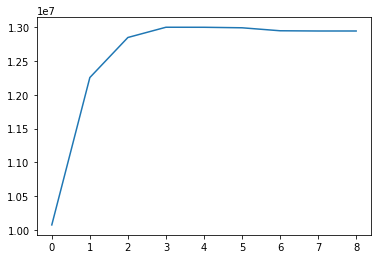

In [24]:
table = [gain_seuil(n/10) for n in range(1,10)]
seuil = [(n/10) for n in range(1,10)]
plt.plot(table)
max_val = max(table)
max_threshold = table.index(max_val)
print(f'Le gain maximum est {max_val} et il est obtenu avec un seuil de {max_threshold}')

*<center> Récupérer les 100 plus grosses erreurs </center>*

In [25]:
df['absolute_error'] = (df['1 probability']-df['SeriousDlqin2yrs']).abs()
desc_order = df.sort_values(by='absolute_error', ascending = False).head(100)
desc_order.to_csv('../handson-ml2/100error.csv', index=False)

## Sixième étape: Préparer les données de test

In [26]:
df = read_csv('../handson-ml2/kaggle-give-me-credit-test.csv')

In [27]:
df = df.rename(columns={"Unnamed: 0": "Id"})
df['IncomePerPerson'] = df['MonthlyIncome']/ (df['NumberOfDependents']+1)
df['NumberOfDaysLate'] = df['NumberOfTimes90DaysLate']+ df['NumberOfTime60-89DaysPastDueNotWorse']+ df['NumberOfTime30-59DaysPastDueNotWorse']
df['NumberCreditLines'] = df['NumberOfOpenCreditLinesAndLoans']- df['NumberRealEstateLoansOrLines']
df['MonthlyDebt'] = df['MonthlyIncome'] * df['DebtRatio']
df['MonthlyBalance'] = df['MonthlyIncome'] - df['MonthlyDebt']
df['DebtPerPerson'] = df['MonthlyDebt'] / ( df['NumberOfDependents'] + 1 )

In [28]:
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomePerPerson,NumberOfDaysLate,NumberCreditLines,MonthlyDebt,MonthlyBalance,DebtPerPerson
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,5700.000000,0,4,1011.822487,4688.177513,1011.822487
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,3047.000000,0,11,4819.472759,4321.527241,1606.490920
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,1694.333333,0,11,3495.312354,1587.687646,1165.104118
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,3200.000000,1,5,2963.074038,236.925962,2963.074038
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,1932.500000,0,4,76.980082,3788.019918,38.490041
5,6,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0,2070.000000,0,4,1417.657571,2722.342429,708.828786
6,7,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0,0.000000,0,5,0.000000,0.000000,0.000000
7,8,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0,1650.500000,1,7,1218.630830,2082.369170,609.315415
8,9,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0,NaN,0,3,NaN,NaN,NaN
9,10,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0,0.000000,294,0,0.000000,0.000000,0.000000


In [29]:
df.to_csv("test.csv")

*<center> Créer un dataset de test </center>*

In [30]:
test_source = api.create_source('../handson-ml2/test.csv')
api.ok(test_source)

In [31]:
test_dataset = api.create_dataset(test_source)

## Septième étape: Modèle avec le trainfull/test

In [32]:
model1 = api.create_model(origin_dataset, {"objective_field":"SeriousDlqin2yrs"})
api.ok(model1)

True

In [33]:
batch_prediction2 = api.create_batch_prediction(model1, test_dataset, {"output_fields": ["Id"], "probabilities": True})
api.ok(batch_prediction2)

True

In [34]:
api.download_batch_prediction(batch_prediction2, filename='../handson-ml2/my_predictionsfinales.csv')

'../handson-ml2/my_predictionsfinales.csv'

## Huitième étape: Soumission à Kaggle

In [35]:
submit = read_csv('../handson-ml2/my_predictionsfinales.csv')

*<center> Mettre au bon format pour kaggle </center>*

In [36]:
submit = submit.rename(columns={"1 probability": "Probability"})
submit = submit.drop(columns={"0 probability", "SeriousDlqin2yrs"})

In [37]:
submit

,Id,Probability
0,1,0.05336
1,2,0.04569
2,3,0.01695
3,4,0.08651
4,5,0.10955
5,6,0.03722
6,7,0.08419
7,8,0.04053
8,9,0.00534
9,10,0.68120


In [38]:
submit.to_csv("submitkaggle.csv", index=False)

In [39]:
submission_file = "submitkaggle.csv"

*<center> Soumission à kaggle </center>*

In [40]:
kaggle.api.competition_submit(submission_file, "BigML model", "GiveMeSomeCredit")

100%|██████████| 1.71M/1.71M [00:03<00:00, 452kB/s] 


Successfully submitted to Give Me Some Credit